In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
%matplotlib inline

In [2]:
os.chdir(r'E:\My career\Data Science\EDwisor\Projects\Employee Absentism')

In [3]:
os.getcwd()

'E:\\My career\\Data Science\\EDwisor\\Projects\\Employee Absentism'

In [4]:
df = pd.read_excel('Absenteeism_at_work_Project.xls')

In [5]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [6]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,737.000000,739.000000,740.000000,740.000000,733.000000,737.000000,737.000000,737.000000,730.000000,...,734.000000,730.000000,734.000000,737.000000,736.000000,738.000000,739.000000,726.000000,709.000000,718.000000
mean,18.017568,19.188602,6.319350,3.914865,2.544595,221.035471,29.667571,12.565807,36.449118,271188.860274,...,0.053134,1.295890,1.017711,0.567164,0.073370,0.746612,79.063599,172.152893,26.684062,6.977716
std,11.021247,8.437493,3.435948,1.421675,1.111831,66.954179,14.848124,4.389813,6.480148,38981.880873,...,0.224453,0.676965,1.094928,0.495805,0.260919,1.319726,12.868630,6.081065,4.292819,13.476962
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,284853.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [7]:
rows,columns = df.shape
print('Rows = ', rows, 'Column = ', columns)

Rows =  740 Column =  21


In [8]:
df.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [9]:
df.nunique()

ID                                 36
Reason for absence                 28
Month of absence                   13
Day of the week                     5
Seasons                             4
Transportation expense             24
Distance from Residence to Work    25
Service time                       18
Age                                22
Work load Average/day              38
Hit target                         13
Disciplinary failure                2
Education                           4
Son                                 5
Social drinker                      2
Social smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body mass index                    17
Absenteeism time in hours          19
dtype: int64

# Datatype conversion

In [10]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [11]:
continuous_var = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target','Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

categorical_var = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons','Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet']

In [12]:
print("Data type conersion")
for i in categorical_var:
    df[i]=df[i].astype('category')
    print(i,':',df[i].dtypes)


Data type conersion
ID : category
Reason for absence : category
Month of absence : category
Day of the week : category
Seasons : category
Disciplinary failure : category
Education : category
Son : category
Social drinker : category
Social smoker : category
Pet : category


In [13]:
print(" Unique Values of the categorical variables")
for i in categorical_var:
    print(i,":", df[i].unique())

 Unique Values of the categorical variables
ID : [11, 36, 3, 7, 10, ..., 25, 12, 16, 4, 35]
Length: 36
Categories (36, int64): [11, 36, 3, 7, ..., 12, 16, 4, 35]
Reason for absence : [26.0, 0.0, 23.0, 7.0, 22.0, ..., 4.0, 3.0, NaN, 2.0, 16.0]
Length: 29
Categories (28, float64): [26.0, 0.0, 23.0, 7.0, ..., 4.0, 3.0, 2.0, 16.0]
Month of absence : [7.0, 8.0, 9.0, 10.0, NaN, ..., 3.0, 4.0, 5.0, 6.0, 0.0]
Length: 14
Categories (13, float64): [7.0, 8.0, 9.0, 10.0, ..., 4.0, 5.0, 6.0, 0.0]
Day of the week : [3, 4, 5, 6, 2]
Categories (5, int64): [3, 4, 5, 6, 2]
Seasons : [1, 4, 2, 3]
Categories (4, int64): [1, 4, 2, 3]
Disciplinary failure : [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Education : [1.0, 3.0, 2.0, NaN, 4.0]
Categories (4, float64): [1.0, 3.0, 2.0, 4.0]
Son : [2.0, 1.0, 0.0, 4.0, 3.0, NaN]
Categories (5, float64): [2.0, 1.0, 0.0, 4.0, 3.0]
Social drinker : [1.0, 0.0, NaN]
Categories (2, float64): [1.0, 0.0]
Social smoker : [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 

In [14]:
df['Reason for absence']= df['Reason for absence'].replace(0,np.nan)
df['Month of absence'] = df['Month of absence'].replace(0,np.nan)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    category
 1   Reason for absence               694 non-null    category
 2   Month of absence                 736 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           733 non-null    float64 
 6   Distance from Residence to Work  737 non-null    float64 
 7   Service time                     737 non-null    float64 
 8   Age                              737 non-null    float64 
 9   Work load Average/day            730 non-null    float64 
 10  Hit target                       734 non-null    float64 
 11  Disciplinary failure             734 non-null    category
 12  Educatio

# Missing value Analysis

In [16]:
df.isnull().sum()

ID                                  0
Reason for absence                 46
Month of absence                    4
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

### Observation before imputation

<AxesSubplot:>

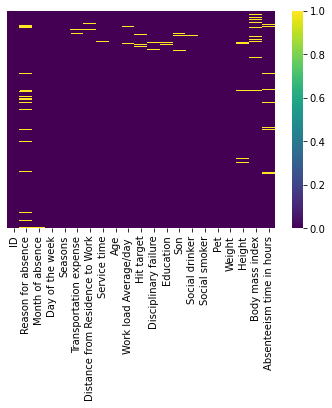

In [17]:
sns.heatmap(df.isnull(), yticklabels = False, cmap = 'viridis')

#### Checking for the best method for imputation

In [18]:
print(df['Transportation expense'][1])

118.0


In [19]:
df['Transportation expense'][1]=np.nan

<ipython-input-19-ec6ead275b3c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transportation expense'][1]=np.nan


In [20]:
df['Transportation expense'][1]

nan

- Actual Value = 118
- Mean value = 221.1762295081967
- Median value = 225
- Knn imputation = 118

#### Mean

In [21]:
#df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].mean())

In [22]:
#print(df['Transportation expense'][1])

#### Median

In [23]:
#df['Transportation expense'] = df['Transportation expense'].fillna(df['Transportation expense'].median())

In [24]:
#print(df['Transportation expense'][1])

#### Knn - imputation  - Nearest one

In [25]:
imputer = KNNImputer(n_neighbors= 2)
df[:] = imputer.fit_transform(df)

In [26]:
print(df['Transportation expense'][1])

118.0


In [27]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

<AxesSubplot:>

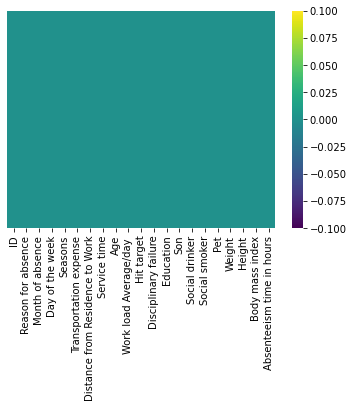

In [28]:
sns.heatmap(df.isnull(), yticklabels = False, cmap ='viridis')

In [29]:
print(" Unique Values of the categorical variables")
for i in categorical_var:
    print(i,":", df[i].unique())

 Unique Values of the categorical variables
ID : [11. 36.  3.  7. 10. 20. 14.  1. 24.  6. 33. 18. 30.  2. 19. 27. 34.  5.
 15. 29. 28. 13. 22. 17. 31. 23. 32.  9. 26. 21.  8. 25. 12. 16.  4. 35.]
Reason for absence : [26.  16.5 23.   7.  22.  19.   1.  11.  14.  21.  10.  13.  28.  18.
 25.  24.  25.5 20.5 24.5  6.  27.  17.   8.  12.  17.5  5.   9.  15.
 11.5  4.   3.  21.5 18.5  2.   7.5 16.  14.5]
Month of absence : [ 7.  8.  9. 10. 11. 12.  1.  2.  3.  4.  5.  6.]
Day of the week : [3. 4. 5. 6. 2.]
Seasons : [1. 4. 2. 3.]
Disciplinary failure : [0. 1.]
Education : [1. 3. 2. 4.]
Son : [2.  1.  0.  4.  3.  1.5]
Social drinker : [1. 0.]
Social smoker : [0. 1.]
Pet : [1. 0. 4. 2. 5. 8.]


In [30]:
print(" Unique Values of the categorical variables after rounding off")
for i in categorical_var:
    df[i] = df[i].round()
    df[i] = df[i].astype('category')
    print(i,":", df[i].unique())

 Unique Values of the categorical variables after rounding off
ID : [11.0, 36.0, 3.0, 7.0, 10.0, ..., 25.0, 12.0, 16.0, 4.0, 35.0]
Length: 36
Categories (36, float64): [11.0, 36.0, 3.0, 7.0, ..., 12.0, 16.0, 4.0, 35.0]
Reason for absence : [26.0, 16.0, 23.0, 7.0, 22.0, ..., 9.0, 15.0, 4.0, 3.0, 2.0]
Length: 28
Categories (28, float64): [26.0, 16.0, 23.0, 7.0, ..., 15.0, 4.0, 3.0, 2.0]
Month of absence : [7.0, 8.0, 9.0, 10.0, 11.0, ..., 2.0, 3.0, 4.0, 5.0, 6.0]
Length: 12
Categories (12, float64): [7.0, 8.0, 9.0, 10.0, ..., 3.0, 4.0, 5.0, 6.0]
Day of the week : [3.0, 4.0, 5.0, 6.0, 2.0]
Categories (5, float64): [3.0, 4.0, 5.0, 6.0, 2.0]
Seasons : [1.0, 4.0, 2.0, 3.0]
Categories (4, float64): [1.0, 4.0, 2.0, 3.0]
Disciplinary failure : [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Education : [1.0, 3.0, 2.0, 4.0]
Categories (4, float64): [1.0, 3.0, 2.0, 4.0]
Son : [2.0, 1.0, 0.0, 4.0, 3.0]
Categories (5, float64): [2.0, 1.0, 0.0, 4.0, 3.0]
Social drinker : [1.0, 0.0]
Categories (2, floa

# Lets see how the data is distributed

C:\Users\Gourav Nandy\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gourav Nandy\Anaconda\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gourav Nandy\Anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Gourav Nandy\Anaconda\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has

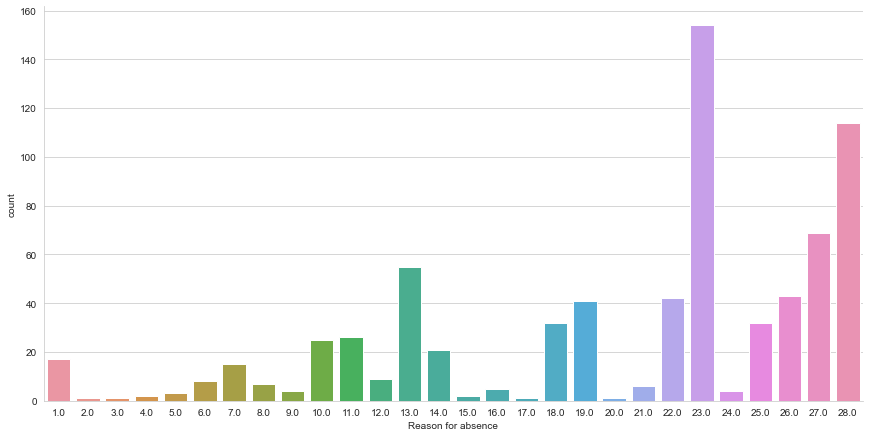

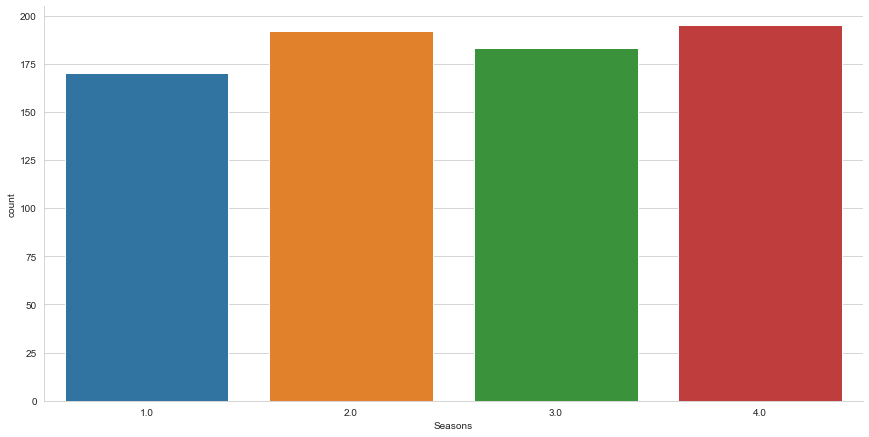

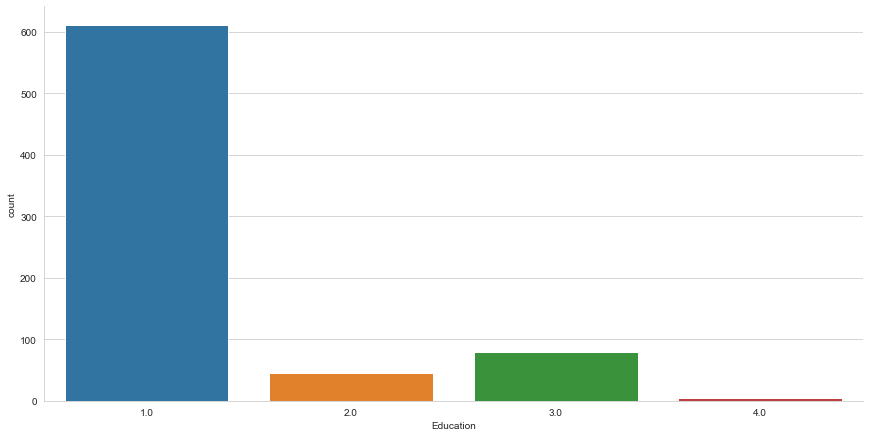

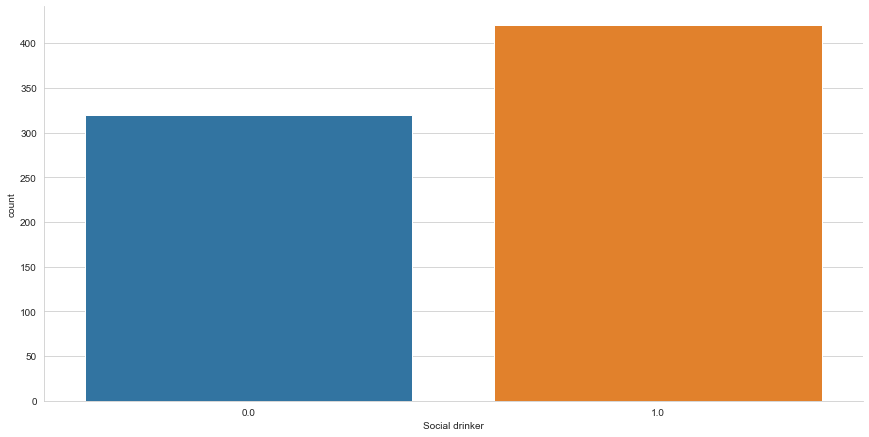

In [31]:
sns.set_style('whitegrid')
sns.factorplot(data=df, x='Reason for absence', kind= 'count',size=6,aspect=2)
sns.factorplot(data=df, x='Seasons', kind= 'count',size=6,aspect=2)
sns.factorplot(data=df, x='Education', kind= 'count',size=6,aspect=2)
sns.factorplot(data=df, x='Social drinker', kind= 'count',size=6,aspect=2)

 From here we interpret that 
 
 - The employee have have given 23, 28, 27, 13 reason the most 
 - Employee are absent most in the 2nd Season 
 - Employee in High school are absent the most as compared to others. 
 - Employee with a habit of Social drinking are likely to be more absent

# Outlier Analysis

<AxesSubplot:>

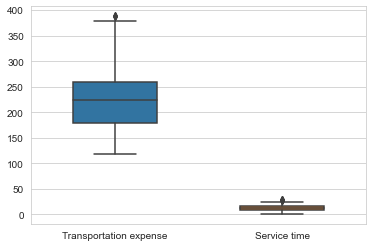

In [32]:
sns.boxplot(data = df[['Transportation expense','Service time']], width = 0.5)

<AxesSubplot:>

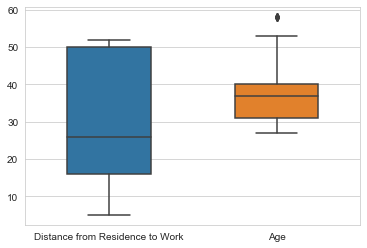

In [33]:
sns.boxplot(data = df[['Distance from Residence to Work',
       'Age',]], width = 0.5 )

<AxesSubplot:>

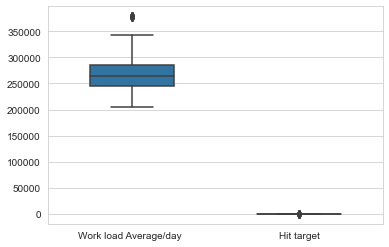

In [34]:
sns.boxplot(data = df[['Work load Average/day ', 'Hit target']], width = 0.5 )

<AxesSubplot:>

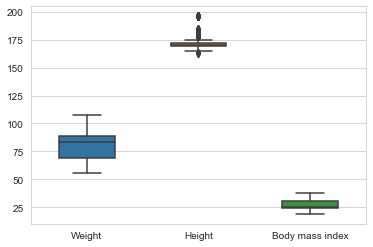

In [35]:
sns.boxplot(data = df[['Weight', 'Height', 'Body mass index']], width = 0.5)

<AxesSubplot:>

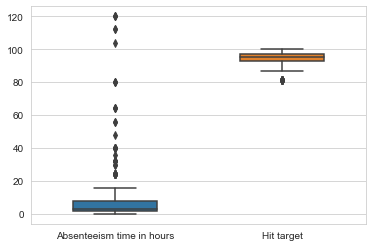

In [36]:
sns.boxplot(data = df[['Absenteeism time in hours', 'Hit target']], width = 0.5 )

### finding the outlier values and filling them with na

In [37]:
for i in continuous_var:
    q75 = np.percentile(df[i],75)
    q25 = np.percentile(df[i],25)
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    df.loc[df[i]< min_val,i] = np.nan
    df.loc[df[i]> max_val,i] = np.nan


In [38]:
df.isnull().sum()

ID                                   0
Reason for absence                   0
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               3
Distance from Residence to Work      0
Service time                         5
Age                                  8
Work load Average/day               31
Hit target                          19
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                             119
Body mass index                      0
Absenteeism time in hours           46
dtype: int64

In [39]:
imputer = KNNImputer(n_neighbors= 2)
df[:] = imputer.fit_transform(df)
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

<AxesSubplot:>

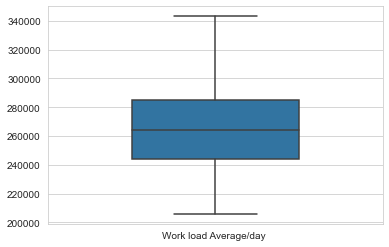

In [40]:
sns.boxplot(data = df[['Work load Average/day ']], width = 0.5)

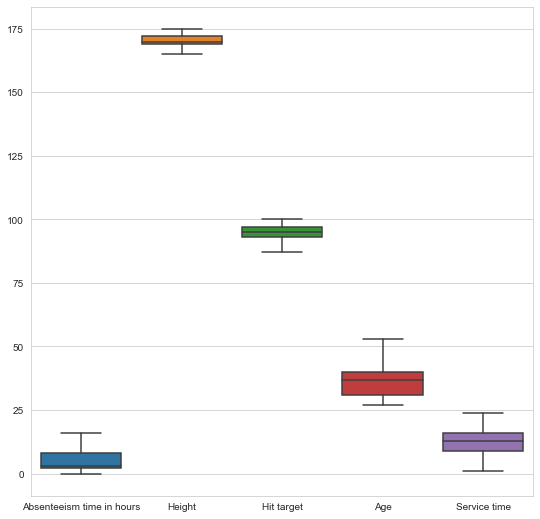

In [41]:
sns.boxplot(data=df[['Absenteeism time in hours','Height','Hit target','Age','Service time']])
plt.gcf().set_size_inches(9,9)

# Feature Selection 

#### Multicolinearity

In [42]:
X = df.drop(["Absenteeism time in hours"] , axis = 1)
y = df["Absenteeism time in hours"]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [44]:
X_train.shape, X_test.shape

((518, 20), (222, 20))

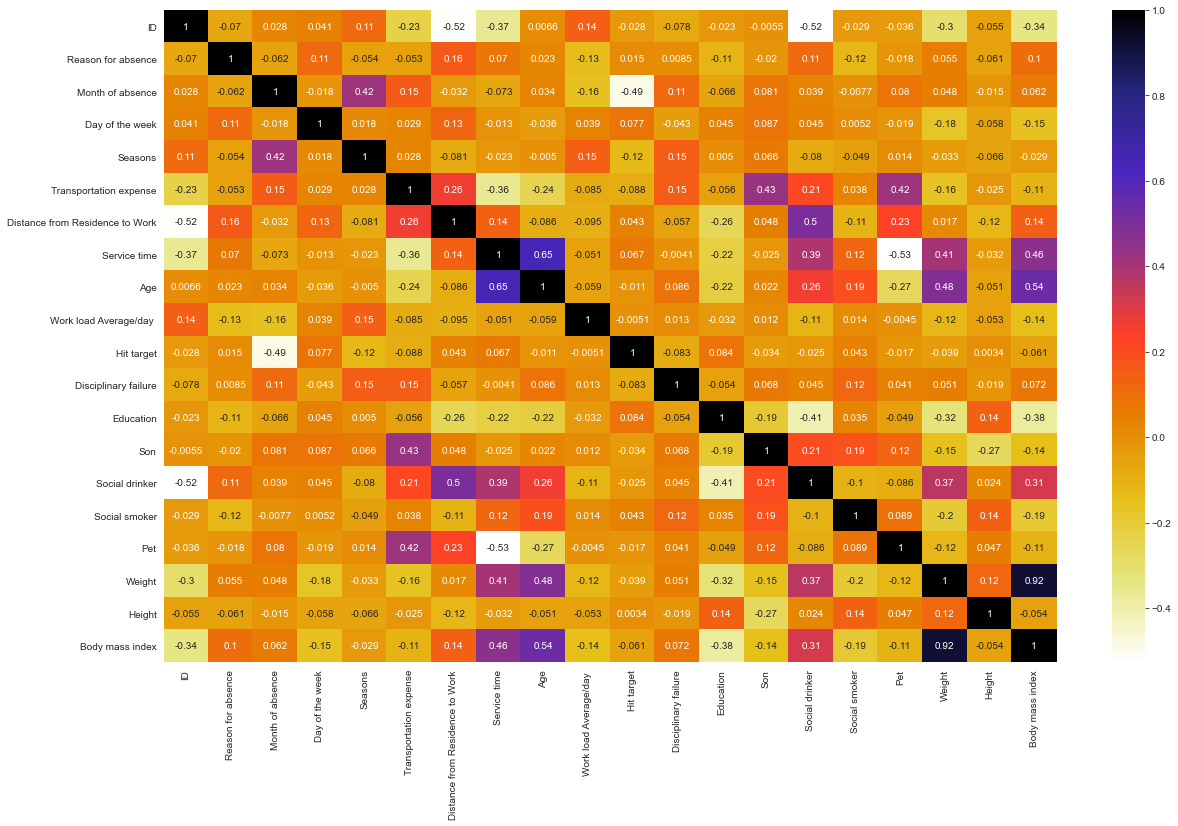

In [45]:
plt.figure(figsize=(20,12))
corr = X_train.corr()
sns.heatmap(corr, annot = True, cmap=plt.cm.CMRmap_r)
plt.show()

In [46]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if np.abs(corr_matrix.iloc[i, j] > threshold): # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [48]:
corr_features

{'Body mass index'}

In [49]:
df = df.drop(corr_features,axis=1)

In [50]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,4.0
1,36.0,16.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,170.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239554.0,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239554.0,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,2.0


# Feature Scaling

In [51]:
continuous_var.remove('Body mass index')

In [52]:
for i in continuous_var:
    if i == 'Absenteeism time in hours':
        continue
    else:
        df[i] = (df[i]-df[i].mean())/df[i].std()

In [53]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,1.033198,0.427110,0.132875,-0.520545,-0.854639,0.681531,0.0,1.0,2.0,1.0,0.0,1.0,0.851053,1.002144,4.0
1,36.0,16.0,7.0,3.0,1.0,-1.550486,-1.121881,1.331988,2.266624,-0.854639,0.681531,1.0,1.0,1.0,1.0,0.0,0.0,1.471907,-0.091238,0.0
2,3.0,23.0,7.0,4.0,1.0,-0.628821,1.437322,1.331988,0.299211,-0.854639,0.681531,0.0,1.0,0.0,1.0,0.0,0.0,0.773446,-0.091238,2.0
3,7.0,7.0,7.0,5.0,1.0,0.882105,-1.660660,0.372697,0.463162,-0.854639,0.681531,0.0,1.0,2.0,1.0,1.0,0.0,-0.856296,-1.184620,4.0
4,11.0,23.0,7.0,5.0,1.0,1.033198,0.427110,0.132875,-0.520545,-0.854639,0.681531,0.0,1.0,2.0,1.0,0.0,1.0,0.851053,1.002144,2.0


# Feature Engineering

In [54]:
df = pd.get_dummies(data=df,columns=categorical_var)

In [55]:
df.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Weight,Height,Absenteeism time in hours,ID_1.0,...,Social drinker_0.0,Social drinker_1.0,Social smoker_0.0,Social smoker_1.0,Pet_0.0,Pet_1.0,Pet_2.0,Pet_4.0,Pet_5.0,Pet_8.0
0,1.033198,0.427110,0.132875,-0.520545,-0.854639,0.681531,0.851053,1.002144,4.0,0,...,0,1,1,0,0,1,0,0,0,0
1,-1.550486,-1.121881,1.331988,2.266624,-0.854639,0.681531,1.471907,-0.091238,0.0,0,...,0,1,1,0,1,0,0,0,0,0
2,-0.628821,1.437322,1.331988,0.299211,-0.854639,0.681531,0.773446,-0.091238,2.0,0,...,0,1,1,0,1,0,0,0,0,0
3,0.882105,-1.660660,0.372697,0.463162,-0.854639,0.681531,-0.856296,-1.184620,4.0,0,...,0,1,0,1,1,0,0,0,0,0
4,1.033198,0.427110,0.132875,-0.520545,-0.854639,0.681531,0.851053,1.002144,2.0,0,...,0,1,1,0,0,1,0,0,0,0


In [56]:
df.shape

(740, 115)

# Dimension Reduction

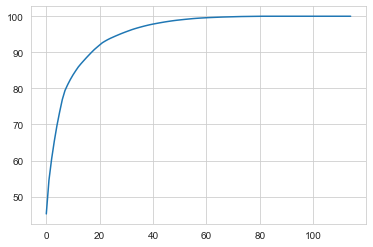

In [57]:
from sklearn.decomposition import PCA
X = df.values
pca = PCA(n_components=115)
pca.fit(X)

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(var)


Around 98%+ variance can be explained by 42 variables

In [58]:
pca = PCA(n_components=42)
pca.fit(X)

PCA(n_components=42)

# Modelling

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 102)

#### Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
y_pred = lm.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("R square Score for Linear Regression :" , score)

R square Score for Linear Regression : 0.9999999999931274


#### Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [64]:
score = r2_score(y_test, y_pred)
print("R square Score for Decision Tree :" , score)

R square Score for Decision Tree : 0.9613241597122618


#### Random Forest 

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 300, random_state=102)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [66]:
score = r2_score(y_test, y_pred)
print("R square Score for Random forest :" , score)

R square Score for Random forest : 0.9999781808732731


### R Squared value (Coefficient of Determination)

The coefficient of determination, denoted R^2 or r^2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

It is a statistic used in the context of statistical models whose main purpose is either the prediction of future outcomes or the testing of hypotheses, on the basis of other related information. It provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model.

R^2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R^2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R^2 of 1 indicates that the regression predictions perfectly fit the data.

The coefficient of determination(R squared) value of models are as follows : 

- Linear Regression :  0.9999999999931274
- Random Forest : 0.9999781808732731
- Decision Tree : 0.9613241597122618

As we can see the Linear Regression model is the closest to 1 or 100% , hence we can conclude that __Linear Regression fits the best__.  